In [ ]:
!pip install shap
# 런타임 다시 시작

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 메뉴 - 런타임 - 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 

In [ ]:
!pip install --upgrade pycaret

In [ ]:
!pip install --upgrade scikit-learn xgboost

  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.26.0 requires scikit-learn<1.5.0,>=0.24, but you have scikit-learn 1.5.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn import set_config
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from IPython.display import Image
from numpy import interp

In [ ]:
# 한글 폰트 지정
plt.rc("font", family = "NanumGothic")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/프로젝트/프로젝트 2주차/data/1조_train_이상치대체.csv', encoding = 'cp949')
df_re = pd.read_csv('/content/drive/MyDrive/프로젝트/프로젝트 2주차/data/1조_train_이상치대체.csv', encoding = 'cp949')
df_re.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time_4bins,time_8bins,요일,주말
0,1,2020-06-01 0:00,8179.056,17.6,2.5,92.0,1,0.0,0,0,0,0,0,0
1,1,2020-06-01 1:00,8135.640,17.7,2.9,91.0,1,0.0,0,0,0,0,0,0
2,1,2020-06-01 2:00,8107.128,17.5,3.2,91.0,0,0.0,0,0,0,0,0,0
3,1,2020-06-01 3:00,8048.808,17.1,3.2,91.0,0,0.0,0,0,0,1,0,0
4,1,2020-06-01 4:00,8043.624,17.0,3.3,92.0,0,0.0,0,0,0,1,0,0


In [ ]:
df_1_1_e = df_re[df_re['num'].isin([4,12,14,16,27,34,37,39,43])]
df_1_2_e = df_re[df_re['num'].isin([2,7,10,13,17,22,25,35,41,46,53,58,59])]
df_1_3_e = df_re[df_re['num'].isin([9,21,23,36,45,51,56])]
df_1_4_e = df_re[df_re['num'].isin([6,18,19,20,29,48,49,50])]
df_2_1_e = df_re[df_re['num'].isin([3,8,24,30,38,40,42,44,47,52,55,60])]
df_2_2_e = df_re[df_re['num'].isin([5,15,28,31,33,54,57])]
df_2_3_e = df_re[df_re['num'].isin([26])]
df_2_4_e = df_re[df_re['num'].isin([1,11,32])]

#df_1_1_e

In [ ]:
from pycaret.regression import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(df_1_1_e, target = '전력사용량(kWh)',
                  train_size = 0.8,
                  ignore_features = ['date_time'],
                  numeric_features = ['기온(°C)','풍속(m/s)','습도(%)', '강수량(mm)', '일조(hr)'],
                  categorical_features = ['num', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말'],
                  # encoding_method = None,
                  # normalize = True,
                  # normalize_method = 'zscore',
                  # remove_outliers = True,
                  # feature_selection = True,
                  # feature_selection_method = 'classic',
                  # fix_imbalance = True,
                  # fix_imbalance_method = 'SMOTE',
                  n_jobs = - 1,
                  session_id = 42)

,Description,Value
0,Session id,42
1,Target,전력사용량(kWh)
2,Target type,Regression
3,Original data shape,"(18360, 14)"
4,Transformed data shape,"(18360, 37)"
5,Transformed train set shape,"(14688, 37)"
6,Transformed test set shape,"(3672, 37)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,7


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,105.6985,30629.2144,174.9683,0.9457,0.1433,0.0889,7.5040
lightgbm,Light Gradient Boosting Machine,116.9866,31603.3247,177.7330,0.9440,0.1499,0.1003,0.9740
et,Extra Trees Regressor,104.6083,31596.6641,177.6757,0.9440,0.1455,0.0880,6.5790
xgboost,Extreme Gradient Boosting,116.0352,32127.1553,179.2091,0.9430,0.1501,0.0981,0.5380
dt,Decision Tree Regressor,135.4977,55382.1708,235.2833,0.9018,0.1905,0.1131,0.3690
gbr,Gradient Boosting Regressor,182.6757,65932.6984,256.5982,0.8832,0.2058,0.1565,1.8320
lr,Linear Regression,309.7835,174485.8796,417.5997,0.6909,0.3925,0.2932,1.6440
ridge,Ridge Regression,309.7748,174485.3732,417.5989,0.6909,0.3922,0.2932,0.3860
br,Bayesian Ridge,309.7693,174485.3564,417.5988,0.6909,0.3919,0.2932,0.4500
llar,Lasso Least Angle Regression,308.8471,174620.9072,417.7549,0.6906,0.3817,0.2919,0.3170


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best

RandomForestRegressor(n_jobs=-1, random_state=42)

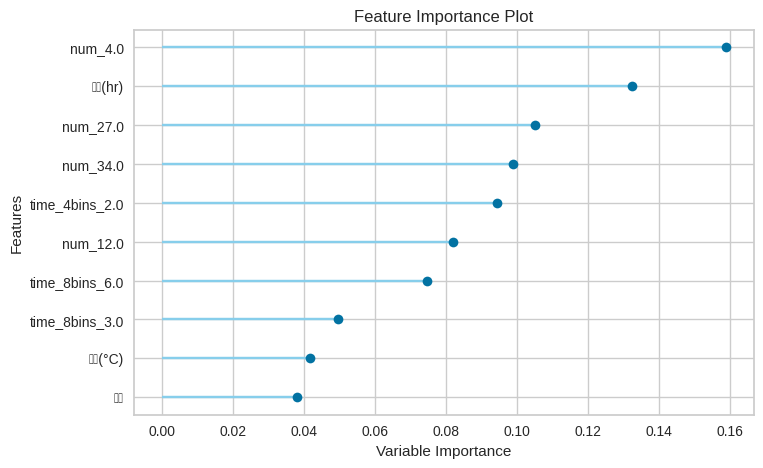

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,103.1600,28497.9525,168.8134,0.9493,0.1459,0.0887


In [ ]:
# 모델 튜닝
tuned_model = tune_model(best, optimize = 'rmse')
tuned_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,210.4895,83732.4420,289.3656,0.8507,0.2613,0.2116
1,211.5045,83195.1799,288.4357,0.8585,0.2441,0.1998
2,210.5267,81647.5517,285.7404,0.8573,0.2504,0.2037
3,208.5525,83486.8954,288.9410,0.8582,0.2419,0.1983
4,199.9853,72078.9478,268.4752,0.8717,0.2438,0.1985
5,206.7925,75639.0138,275.0255,0.8649,0.2660,0.2172
6,207.1054,75935.9104,275.5647,0.8621,0.2445,0.2002
7,210.9410,81359.5767,285.2360,0.8605,0.2496,0.2055
8,199.2039,75501.6934,274.7757,0.8563,0.2384,0.1919


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# 모델 앙상블
ensemble_model = ensemble_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,105.1345,27943.7609,167.1639,0.9502,0.1454,0.0899
1,110.2102,31378.2690,177.1391,0.9466,0.1434,0.0907
2,106.6084,31725.8512,178.1175,0.9446,0.1439,0.0896
3,109.6872,30966.6101,175.9733,0.9474,0.1371,0.0906
4,105.6637,29762.8900,172.5192,0.9470,0.1451,0.0909
5,107.0378,28499.9538,168.8193,0.9491,0.1465,0.0945
6,108.0654,31720.5572,178.1027,0.9424,0.1421,0.0876
7,106.9185,29099.3947,170.5854,0.9501,0.1434,0.0910
8,102.8108,29457.1172,171.6308,0.9439,0.1368,0.0856


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#df_1_2_e

In [ ]:
from pycaret.regression import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(df_1_2_e, target = '전력사용량(kWh)',
                  train_size = 0.8,
                  ignore_features = ['date_time'],
                  numeric_features = ['기온(°C)','풍속(m/s)','습도(%)', '강수량(mm)', '일조(hr)'],
                  categorical_features = ['num', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins',  '요일', '주말'],
                  # encoding_method = None,
                  # normalize = True,
                  # normalize_method = 'zscore',
                  # remove_outliers = True,
                  # feature_selection = True,
                  # feature_selection_method = 'classic',
                  # fix_imbalance = True,
                  # fix_imbalance_method = 'SMOTE',
                  n_jobs = - 1,
                  session_id = 42)

,Description,Value
0,Session id,42
1,Target,전력사용량(kWh)
2,Target type,Regression
3,Original data shape,"(26520, 14)"
4,Transformed data shape,"(26520, 41)"
5,Transformed train set shape,"(21216, 41)"
6,Transformed test set shape,"(5304, 41)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,7


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,113.8715,33071.3824,181.7519,0.9189,0.1439,0.0970,0.6700
rf,Random Forest Regressor,108.1069,33849.1186,183.8687,0.9170,0.1410,0.0902,10.8720
lightgbm,Light Gradient Boosting Machine,119.1135,34390.0757,185.3571,0.9156,0.1466,0.1029,1.3090
et,Extra Trees Regressor,111.0098,36752.2372,191.5945,0.9098,0.1471,0.0923,10.4420
dt,Decision Tree Regressor,135.6006,58793.2250,242.2933,0.8558,0.1844,0.1121,0.5310
gbr,Gradient Boosting Regressor,201.5580,78006.0260,279.1844,0.8086,0.2312,0.1854,2.8180
lr,Linear Regression,310.7136,158061.1647,397.5133,0.6124,0.3707,0.3005,0.3730
ridge,Ridge Regression,310.7015,158060.9588,397.5130,0.6124,0.3706,0.3004,0.5150
br,Bayesian Ridge,310.6716,158061.0046,397.5131,0.6124,0.3703,0.3004,0.3840
llar,Lasso Least Angle Regression,310.0064,158346.3456,397.8691,0.6117,0.3630,0.2987,0.5890


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

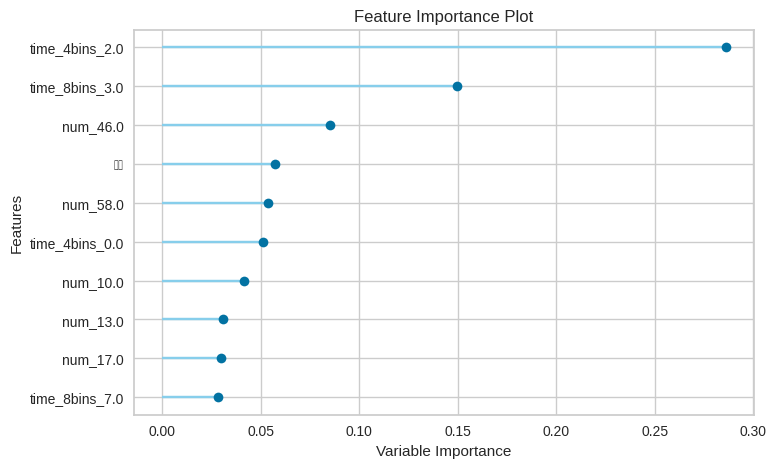

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,112.2660,32840.6953,181.2200,0.9214,0.1428,0.0964


In [ ]:
# 모델 튜닝
tuned_model = tune_model(best, optimize = 'rmse')
tuned_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,109.1555,30992.2266,176.0461,0.9204,0.1411,0.0935
1,111.0578,32415.9180,180.0442,0.9198,0.1469,0.0971
2,115.5436,34619.4922,186.0631,0.9167,0.1445,0.0959
3,115.4032,38376.7695,195.8999,0.9076,0.1518,0.0983
4,114.8153,34887.3281,186.7815,0.9121,0.1468,0.0974
5,118.4817,33723.1328,183.6386,0.9172,0.1527,0.1017
6,116.1501,37860.8750,194.5787,0.9036,0.1483,0.0966
7,113.6357,32965.2266,181.5633,0.9200,0.1415,0.0960
8,119.7812,41757.3477,204.3461,0.8987,0.1622,0.1019


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# 모델 앙상블
ensemble_model = ensemble_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,107.3303,29956.1895,173.0786,0.9231,0.1347,0.0910
1,107.2243,29391.1699,171.4385,0.9273,0.1382,0.0925
2,111.1204,31924.6289,178.6747,0.9232,0.1373,0.0925
3,112.5829,35342.6836,187.9965,0.9149,0.1412,0.0954
4,108.3571,31568.8242,177.6762,0.9205,0.1366,0.0917
5,111.9381,30928.1074,175.8639,0.9240,0.1398,0.0964
6,107.3726,30789.3789,175.4690,0.9216,0.1314,0.0889
7,110.4165,30427.8242,174.4357,0.9262,0.1341,0.0931
8,111.6026,36621.7344,191.3681,0.9112,0.1457,0.0943


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#df_1_3_e

In [ ]:
from pycaret.regression import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(df_1_3_e, target = '전력사용량(kWh)',
                  train_size = 0.8,
                  ignore_features = ['date_time'],
                  numeric_features = ['기온(°C)','풍속(m/s)','습도(%)', '강수량(mm)', '일조(hr)'],
                  categorical_features = ['num', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말'],
                  # encoding_method = None,
                  # normalize = True,
                  # normalize_method = 'zscore',
                  # remove_outliers = True,
                  # feature_selection = True,
                  # feature_selection_method = 'classic',
                  # fix_imbalance = True,
                  # fix_imbalance_method = 'SMOTE',
                  n_jobs = - 1,
                  session_id = 42)

,Description,Value
0,Session id,42
1,Target,전력사용량(kWh)
2,Target type,Regression
3,Original data shape,"(14280, 14)"
4,Transformed data shape,"(14280, 35)"
5,Transformed train set shape,"(11424, 35)"
6,Transformed test set shape,"(2856, 35)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,7


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,72.7763,14010.3783,118.1718,0.9462,0.0798,0.0535,5.1070
rf,Random Forest Regressor,74.5663,14338.0432,119.5775,0.9450,0.0800,0.0545,5.4820
xgboost,Extreme Gradient Boosting,82.2346,15701.2679,125.1867,0.9397,0.0846,0.0605,0.7500
lightgbm,Light Gradient Boosting Machine,84.0646,16252.0191,127.3106,0.9377,0.0862,0.0618,1.5630
dt,Decision Tree Regressor,94.3676,26879.6770,163.7535,0.8967,0.1063,0.0684,0.3140
gbr,Gradient Boosting Regressor,119.4772,29695.7966,172.0589,0.8862,0.1149,0.0885,1.3260
lr,Linear Regression,201.9226,68444.8227,261.3834,0.7374,0.1977,0.1576,0.2870
ridge,Ridge Regression,201.9050,68444.8020,261.3831,0.7374,0.1976,0.1576,0.3270
br,Bayesian Ridge,201.8968,68444.8363,261.3830,0.7374,0.1976,0.1576,0.3220
llar,Lasso Least Angle Regression,201.4928,68622.0922,261.7140,0.7368,0.1961,0.1571,0.2650


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best

ExtraTreesRegressor(n_jobs=-1, random_state=42)

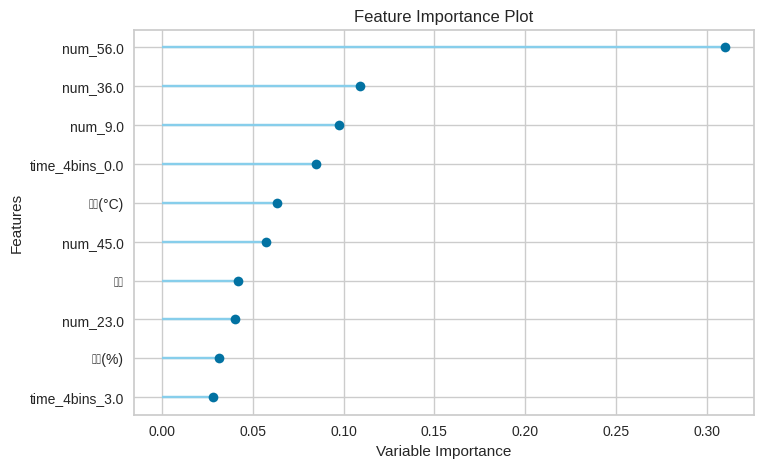

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,69.1836,11787.3018,108.5693,0.9534,0.0747,0.0511


In [ ]:
# 모델 튜닝
tuned_model = tune_model(best, optimize = 'rmse')
tuned_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,127.4089,32900.9280,181.3861,0.8665,0.1290,0.1003
1,133.6688,42043.2003,205.0444,0.8494,0.1293,0.0994
2,120.4016,32064.5895,179.0659,0.8692,0.1297,0.0967
3,129.0362,36568.2168,191.2282,0.8628,0.1231,0.0946
4,128.4998,36491.3209,191.0270,0.8623,0.1264,0.0974
5,135.9282,43689.6917,209.0208,0.8448,0.1283,0.0971
6,127.8286,37954.8845,194.8201,0.8509,0.1226,0.0940
7,121.7687,32148.6396,179.3004,0.8755,0.1245,0.0971
8,128.2049,36621.2914,191.3669,0.8629,0.1227,0.0952


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


ExtraTreesRegressor(n_jobs=-1, random_state=42)

In [ ]:
# 모델 앙상블
ensemble_model = ensemble_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,75.3286,13312.3225,115.3790,0.9460,0.0836,0.0563
1,75.3099,15389.3780,124.0539,0.9449,0.0764,0.0534
2,75.1933,14085.2071,118.6811,0.9425,0.0901,0.0581
3,79.4478,15772.9248,125.5903,0.9408,0.0798,0.0558
4,75.7364,16023.9094,126.5856,0.9395,0.0801,0.0547
5,75.5762,14913.1396,122.1194,0.9470,0.0772,0.0534
6,74.3542,13884.0310,117.8305,0.9455,0.0783,0.0541
7,73.0849,13213.4716,114.9499,0.9488,0.0795,0.0554
8,73.8175,14007.7440,118.3543,0.9475,0.0772,0.0536


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#df_1_4_e

In [ ]:
from pycaret.regression import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(df_1_4_e, target = '전력사용량(kWh)',
                  train_size = 0.8,
                  ignore_features = ['date_time'],
                  numeric_features = ['기온(°C)','풍속(m/s)','습도(%)', '강수량(mm)', '일조(hr)'],
                  categorical_features = ['num', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말'],
                  # encoding_method = None,
                  # normalize = True,
                  # normalize_method = 'zscore',
                  # remove_outliers = True,
                  # feature_selection = True,
                  # feature_selection_method = 'classic',
                  # fix_imbalance = True,
                  # fix_imbalance_method = 'SMOTE',
                  n_jobs = - 1,
                  session_id = 42)

,Description,Value
0,Session id,42
1,Target,전력사용량(kWh)
2,Target type,Regression
3,Original data shape,"(16320, 14)"
4,Transformed data shape,"(16320, 36)"
5,Transformed train set shape,"(13056, 36)"
6,Transformed test set shape,"(3264, 36)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,7


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,127.2838,43058.2613,207.2044,0.8948,0.1712,0.1163,0.8090
lightgbm,Light Gradient Boosting Machine,129.3856,43148.5381,207.3150,0.8946,0.1663,0.1183,0.7410
rf,Random Forest Regressor,117.0997,44252.8970,209.9297,0.8919,0.1634,0.1037,6.3950
et,Extra Trees Regressor,119.4438,48154.3691,219.0471,0.8822,0.1712,0.1055,5.5890
dt,Decision Tree Regressor,145.3834,75362.7938,273.9322,0.8165,0.2083,0.1266,0.3440
gbr,Gradient Boosting Regressor,222.9376,96252.8446,309.9672,0.7645,0.2526,0.2105,1.6030
knn,K Neighbors Regressor,285.7712,177292.2859,420.7413,0.5672,0.3238,0.2660,0.3510
ada,AdaBoost Regressor,366.9915,199975.1741,447.0588,0.5109,0.3894,0.3897,0.7150
br,Bayesian Ridge,351.3522,205299.7829,452.9465,0.4981,0.4288,0.3418,0.2830
ridge,Ridge Regression,351.4105,205300.1685,452.9471,0.4981,0.4295,0.3420,0.2690


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

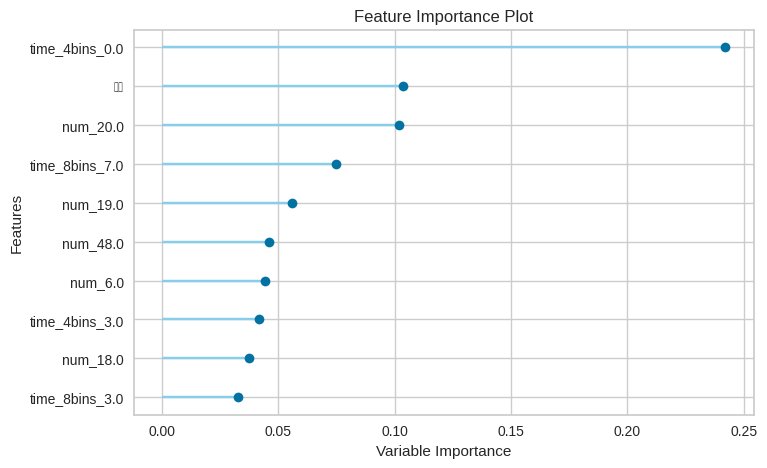

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,122.4254,39481.5195,198.6996,0.9072,0.1652,0.1153


In [ ]:
# 모델 튜닝
tuned_model = tune_model(best, optimize = 'rmse')
tuned_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,132.1971,51230.3867,226.3413,0.8681,0.1827,0.1195
1,116.8918,34618.5742,186.0607,0.9099,0.1715,0.1126
2,129.8017,45962.5430,214.3888,0.8832,0.1850,0.1200
3,123.0572,44245.8594,210.3470,0.8867,0.1739,0.1109
4,123.9680,42808.8867,206.9031,0.9011,0.1733,0.1160
5,126.9375,47811.7383,218.6590,0.8836,0.1771,0.1148
6,132.3978,50615.9180,224.9798,0.8908,0.1774,0.1172
7,127.1728,49815.8242,223.1946,0.8711,0.1829,0.1195
8,133.1153,52249.2461,228.5809,0.8844,0.1796,0.1203


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# 모델 앙상블
ensemble_model = ensemble_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,128.3232,44296.2852,210.4668,0.8859,0.1726,0.1177
1,110.6079,29411.4355,171.4976,0.9235,0.1497,0.1049
2,127.7230,44583.1602,211.1472,0.8867,0.1751,0.1170
3,114.9096,36311.2148,190.5550,0.9070,0.1571,0.1060
4,118.9152,40056.8867,200.1422,0.9075,0.1640,0.1126
5,120.4477,40176.8711,200.4417,0.9022,0.1620,0.1122
6,130.2128,47578.6797,218.1254,0.8973,0.1642,0.1136
7,122.4596,46078.4570,214.6589,0.8807,0.1709,0.1144
8,124.9647,42985.9375,207.3305,0.9049,0.1610,0.1102


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#df_2_1_e

In [ ]:
from pycaret.regression import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(df_2_1_e, target = '전력사용량(kWh)',
                  train_size = 0.8,
                  ignore_features = ['date_time'],
                  numeric_features = ['기온(°C)','풍속(m/s)','습도(%)', '강수량(mm)', '일조(hr)'],
                  categorical_features = ['num', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말'],
                  # encoding_method = None,
                  # normalize = True,
                  # normalize_method = 'zscore',
                  # remove_outliers = True,
                  # feature_selection = True,
                  # feature_selection_method = 'classic',
                  # fix_imbalance = True,
                  # fix_imbalance_method = 'SMOTE',
                  n_jobs = - 1,
                  session_id = 42)

,Description,Value
0,Session id,42
1,Target,전력사용량(kWh)
2,Target type,Regression
3,Original data shape,"(24480, 14)"
4,Transformed data shape,"(24480, 40)"
5,Transformed train set shape,"(19584, 40)"
6,Transformed test set shape,"(4896, 40)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,7


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,299.2116,283850.3156,531.7636,0.9599,0.1375,0.0849,0.8770
lightgbm,Light Gradient Boosting Machine,312.0461,294615.4671,542.1264,0.9583,0.1395,0.0903,1.0380
rf,Random Forest Regressor,280.8534,298493.2758,545.4260,0.9578,0.1336,0.0778,10.3820
et,Extra Trees Regressor,280.0444,307964.1075,553.5030,0.9565,0.1388,0.0780,9.8400
dt,Decision Tree Regressor,349.5669,509812.8425,712.8683,0.9279,0.1734,0.0954,0.5650
gbr,Gradient Boosting Regressor,478.5788,517447.3381,718.7700,0.9269,0.1864,0.1394,2.4100
ada,AdaBoost Regressor,976.6055,1729731.0384,1314.7650,0.7552,0.3805,0.3410,1.4190
br,Bayesian Ridge,910.4155,1732348.4119,1316.0036,0.7549,0.3362,0.2533,0.3630
llar,Lasso Least Angle Regression,908.7600,1732347.2858,1316.0032,0.7549,0.3310,0.2523,0.5400
ridge,Ridge Regression,910.4033,1732347.7323,1316.0033,0.7549,0.3362,0.2533,0.3330


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

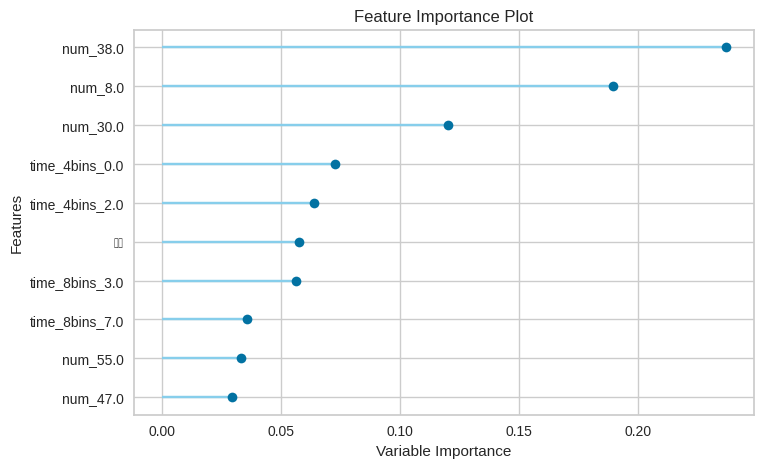

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,296.0635,269679.0000,519.3062,0.9642,0.1321,0.0831


In [ ]:
# 모델 튜닝
tuned_model = tune_model(best, optimize = 'rmse')
tuned_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,322.1804,358142.2500,598.4499,0.9488,0.1447,0.0924
1,300.8896,264104.3438,513.9108,0.9633,0.1342,0.0827
2,322.1070,423568.3438,650.8213,0.9432,0.1446,0.0880
3,312.1668,338231.0938,581.5764,0.9547,0.1455,0.0886
4,317.4771,339981.5938,583.0794,0.9498,0.1431,0.0876
5,317.6704,328317.1250,572.9896,0.9512,0.1557,0.0916
6,331.1804,351111.6250,592.5468,0.9514,0.1531,0.0946
7,304.5402,298837.0625,546.6599,0.9613,0.1338,0.0850
8,297.4330,270090.4062,519.7022,0.9596,0.1395,0.0830


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# 모델 앙상블
ensemble_model = ensemble_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,301.7610,316049.1875,562.1825,0.9548,0.1416,0.0883
1,286.0772,253882.5469,503.8676,0.9647,0.1286,0.0789
2,304.2030,355715.0000,596.4185,0.9523,0.1347,0.0830
3,290.6327,293861.4062,542.0898,0.9606,0.1331,0.0824
4,289.4479,290687.8750,539.1548,0.9570,0.1302,0.0800
5,292.0645,269037.1562,518.6879,0.9600,0.1426,0.0856
6,306.1749,283980.1562,532.8979,0.9607,0.1461,0.0893
7,282.6783,253849.2969,503.8346,0.9671,0.1258,0.0788
8,278.4413,231220.1094,480.8535,0.9654,0.1274,0.0787


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#df_2_2_e

In [ ]:
from pycaret.regression import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(df_2_2_e, target = '전력사용량(kWh)',
                  train_size = 0.8,
                  ignore_features = ['date_time'],
                  numeric_features = ['기온(°C)','풍속(m/s)','습도(%)', '강수량(mm)', '일조(hr)'],
                  categorical_features = ['num', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말'],
                  # encoding_method = None,
                  # normalize = True,
                  # normalize_method = 'zscore',
                  # remove_outliers = True,
                  # feature_selection = True,
                  # feature_selection_method = 'classic',
                  # fix_imbalance = True,
                  # fix_imbalance_method = 'SMOTE',
                  n_jobs = - 1,
                  session_id = 42)

,Description,Value
0,Session id,42
1,Target,전력사용량(kWh)
2,Target type,Regression
3,Original data shape,"(14280, 14)"
4,Transformed data shape,"(14280, 35)"
5,Transformed train set shape,"(11424, 35)"
6,Transformed test set shape,"(2856, 35)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,7


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,164.9827,72186.4156,268.4347,0.9799,0.0912,0.0573,5.4720
et,Extra Trees Regressor,161.0765,72371.3225,268.6329,0.9799,0.0911,0.0554,5.0250
lightgbm,Light Gradient Boosting Machine,181.6548,75464.8523,274.4100,0.9790,0.0960,0.0643,1.2060
xgboost,Extreme Gradient Boosting,180.9096,75915.7172,275.3720,0.9789,0.0950,0.0631,0.4510
gbr,Gradient Boosting Regressor,230.3985,108405.1840,328.9973,0.9698,0.1168,0.0826,1.5070
dt,Decision Tree Regressor,217.7674,140195.4751,374.2677,0.9611,0.1264,0.0749,0.3090
ada,AdaBoost Regressor,375.6526,241769.2491,491.6492,0.9328,0.1798,0.1365,1.2290
br,Bayesian Ridge,392.5159,282820.0834,531.7280,0.9214,0.1663,0.1276,0.2650
llar,Lasso Least Angle Regression,391.2446,282827.5272,531.7322,0.9214,0.1659,0.1273,0.4870
ridge,Ridge Regression,392.4702,282821.5092,531.7291,0.9214,0.1663,0.1277,0.2550


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best

RandomForestRegressor(n_jobs=-1, random_state=42)

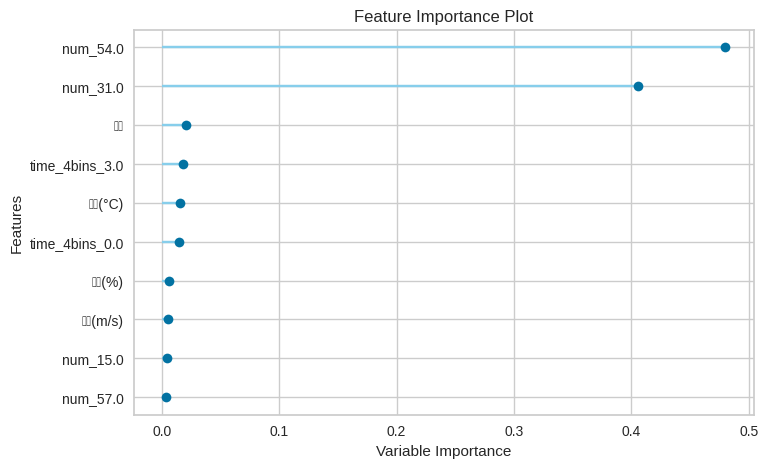

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,167.6132,75905.2450,275.5091,0.9795,0.0878,0.0564


In [ ]:
# 모델 튜닝
tuned_model = tune_model(best, optimize = 'rmse')
tuned_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,272.7734,143241.2340,378.4722,0.9599,0.1252,0.0942
1,270.7656,136359.7020,369.2691,0.9625,0.1203,0.0915
2,254.6282,140198.1497,374.4304,0.9586,0.1165,0.0845
3,270.8075,141403.9150,376.0371,0.9593,0.1306,0.0972
4,266.7594,136426.3882,369.3594,0.9612,0.1254,0.0934
5,257.3371,131679.6592,362.8769,0.9633,0.1264,0.0912
6,269.1879,146641.4908,382.9380,0.9606,0.1218,0.0899
7,256.1780,127829.5481,357.5326,0.9642,0.1159,0.0855
8,278.5422,143185.9165,378.3991,0.9616,0.1232,0.0942


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# 모델 앙상블
ensemble_model = ensemble_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,164.6732,68809.1654,262.3150,0.9807,0.0920,0.0585
1,171.0307,76642.6392,276.8441,0.9789,0.0927,0.0599
2,164.7615,86427.1548,293.9850,0.9745,0.0925,0.0567
3,165.3026,65795.3677,256.5061,0.9811,0.0921,0.0605
4,165.4736,65489.0760,255.9083,0.9814,0.0886,0.0585
5,161.7867,71444.0878,267.2903,0.9801,0.0949,0.0587
6,176.5974,78034.9528,279.3474,0.9790,0.0938,0.0604
7,163.5918,63650.0122,252.2895,0.9822,0.0874,0.0556
8,171.8852,69295.8500,263.2410,0.9814,0.0895,0.0588


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#df_2_3_e

In [ ]:
from pycaret.regression import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(df_2_3_e, target = '전력사용량(kWh)',
                  train_size = 0.8,
                  ignore_features = ['date_time'],
                  numeric_features = ['기온(°C)','풍속(m/s)','습도(%)', '강수량(mm)', '일조(hr)'],
                  categorical_features = ['num', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말'],
                  # encoding_method = None,
                  # normalize = True,
                  # normalize_method = 'zscore',
                  # remove_outliers = True,
                  # feature_selection = True,
                  # feature_selection_method = 'classic',
                  # fix_imbalance = True,
                  # fix_imbalance_method = 'SMOTE',
                  n_jobs = - 1,
                  session_id = 42)

,Description,Value
0,Session id,42
1,Target,전력사용량(kWh)
2,Target type,Regression
3,Original data shape,"(2040, 14)"
4,Transformed data shape,"(2040, 29)"
5,Transformed train set shape,"(1632, 29)"
6,Transformed test set shape,"(408, 29)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,7


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,150.4911,46730.8845,215.5976,0.9256,0.0667,0.0488,0.7650
rf,Random Forest Regressor,155.5198,53512.5490,230.1313,0.9153,0.0691,0.0501,0.8980
lightgbm,Light Gradient Boosting Machine,161.3792,54588.7699,232.8000,0.9134,0.0697,0.0519,0.8090
xgboost,Extreme Gradient Boosting,160.5381,55722.7609,235.2377,0.9119,0.0711,0.0518,0.2680
gbr,Gradient Boosting Regressor,171.1633,56391.8238,236.2330,0.9107,0.0716,0.0557,0.3350
dt,Decision Tree Regressor,203.8150,101167.1384,315.6848,0.8410,0.0946,0.0657,0.3060
ada,AdaBoost Regressor,265.8010,108890.5173,329.8111,0.8266,0.1077,0.0922,0.5270
ridge,Ridge Regression,280.5164,121072.6205,347.5953,0.8070,0.1182,0.0964,0.1710
br,Bayesian Ridge,280.5121,121075.0844,347.5985,0.8070,0.1181,0.0964,0.1740
llar,Lasso Least Angle Regression,280.7098,121070.3705,347.6046,0.8069,0.1177,0.0963,0.3180


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best

ExtraTreesRegressor(n_jobs=-1, random_state=42)

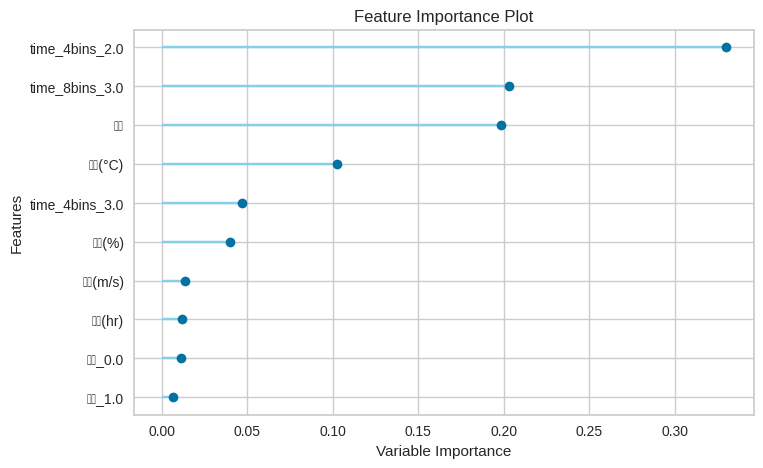

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,156.8010,58018.1183,240.8695,0.9201,0.0702,0.0493


In [ ]:
# 모델 튜닝
tuned_model = tune_model(best, optimize = 'rmse')
tuned_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,201.6853,77813.3929,278.9505,0.8853,0.0829,0.0639
1,192.2724,80442.1121,283.6232,0.8691,0.0850,0.0622
2,200.6707,71021.3980,266.4984,0.8826,0.0856,0.0676
3,202.0229,77624.8772,278.6124,0.8866,0.0841,0.0655
4,193.3900,73860.4569,271.7728,0.8751,0.0869,0.0660
5,237.2846,106965.6053,327.0560,0.8533,0.0961,0.0741
6,206.0322,78164.3883,279.5789,0.8633,0.0884,0.0696
7,218.1206,93105.2131,305.1315,0.8557,0.0962,0.0729
8,209.7685,85883.9999,293.0597,0.8823,0.0860,0.0642


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


ExtraTreesRegressor(n_jobs=-1, random_state=42)

In [ ]:
# 모델 앙상블
ensemble_model = ensemble_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,156.6133,53221.4471,230.6977,0.9215,0.0677,0.0489
1,153.5333,50222.0065,224.1027,0.9183,0.0682,0.0493
2,154.4118,49449.7708,222.3730,0.9183,0.0690,0.0503
3,141.1838,41714.2171,204.2406,0.9390,0.0616,0.0452
4,157.2642,46254.8610,215.0694,0.9218,0.0670,0.0519
5,173.4693,69500.9742,263.6304,0.9047,0.0779,0.0539
6,136.8097,38022.4239,194.9934,0.9335,0.0616,0.0464
7,158.0205,53508.1030,231.3182,0.9171,0.0703,0.0515
8,152.4044,43440.5568,208.4240,0.9405,0.0638,0.0480


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#df_2_4_e

In [ ]:
from pycaret.regression import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(df_2_4_e, target = '전력사용량(kWh)',
                  train_size = 0.8,
                  ignore_features = ['date_time'],
                  numeric_features = ['기온(°C)','풍속(m/s)','습도(%)', '강수량(mm)', '일조(hr)'],
                  categorical_features = ['num', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말'],
                  # encoding_method = None,
                  # normalize = True,
                  # normalize_method = 'zscore',
                  # remove_outliers = True,
                  # feature_selection = True,
                  # feature_selection_method = 'classic',
                  # fix_imbalance = True,
                  # fix_imbalance_method = 'SMOTE',
                  n_jobs = - 1,
                  session_id = 42)

,Description,Value
0,Session id,42
1,Target,전력사용량(kWh)
2,Target type,Regression
3,Original data shape,"(6120, 14)"
4,Transformed data shape,"(6120, 31)"
5,Transformed train set shape,"(4896, 31)"
6,Transformed test set shape,"(1224, 31)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,7


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,117.1007,87964.6877,294.1203,0.9907,0.1226,0.0541,0.4200
rf,Random Forest Regressor,105.4152,89154.4202,295.1668,0.9906,0.1211,0.0482,2.6110
et,Extra Trees Regressor,104.8951,96657.0678,307.7006,0.9898,0.1272,0.0490,2.0380
xgboost,Extreme Gradient Boosting,121.0108,97821.0586,310.4212,0.9896,0.1367,0.0579,0.3270
gbr,Gradient Boosting Regressor,170.7017,101953.9219,318.1718,0.9892,0.1500,0.0877,0.9670
dt,Decision Tree Regressor,118.3590,135603.5041,364.6051,0.9856,0.1506,0.0524,0.2350
ada,AdaBoost Regressor,528.1546,494399.3770,702.9549,0.9475,0.4276,0.3869,0.4900
ridge,Ridge Regression,693.4016,666404.6432,816.1046,0.9292,0.4300,0.3906,0.3810
br,Bayesian Ridge,693.2677,666405.2733,816.1042,0.9292,0.4298,0.3902,0.3860
llar,Lasso Least Angle Regression,692.7123,666503.5901,816.1678,0.9292,0.4313,0.3920,0.2050


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best

LGBMRegressor(n_jobs=-1, random_state=42)

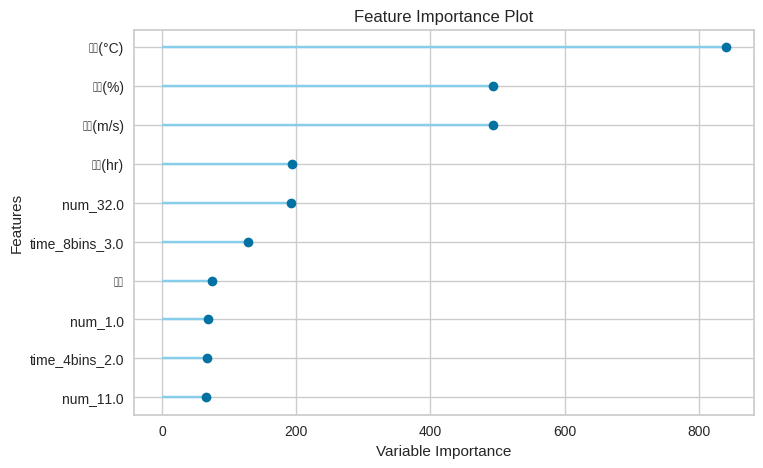

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,108.7832,71928.0570,268.1941,0.9925,0.1107,0.0485


In [ ]:
# 모델 튜닝
tuned_model = tune_model(best, optimize = 'rmse')
tuned_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,144.3071,67110.5667,259.0571,0.9930,0.1264,0.0679
1,135.1741,70037.5044,264.6460,0.9926,0.1078,0.0533
2,127.9003,75304.6382,274.4169,0.9919,0.1323,0.0662
3,143.5692,88718.4467,297.8564,0.9902,0.1259,0.0625
4,140.3520,91403.9812,302.3309,0.9905,0.1376,0.0720
5,142.6072,101709.5255,318.9193,0.9893,0.1336,0.0654
6,160.4932,125165.2720,353.7870,0.9873,0.1431,0.0711
7,135.9595,62702.2956,250.4043,0.9932,0.1207,0.0647
8,146.4952,92348.4828,303.8889,0.9898,0.1309,0.0655


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


LGBMRegressor(bagging_fraction=0.6, bagging_freq=3, feature_fraction=0.7,
              learning_rate=0.2, min_child_samples=81, min_split_gain=0.1,
              n_estimators=90, n_jobs=-1, num_leaves=40, random_state=42,
              reg_alpha=0.0005, reg_lambda=0.7)

In [ ]:
# 모델 앙상블
ensemble_model = ensemble_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,102.6538,66496.8488,257.8698,0.9931,0.1091,0.0468
1,110.6768,65604.5054,256.1338,0.9931,0.1063,0.0444
2,102.9031,68386.9552,261.5090,0.9926,0.1165,0.0512
3,116.4676,85989.0855,293.2390,0.9905,0.1139,0.0479
4,114.4228,96187.4462,310.1410,0.9901,0.1317,0.0589
5,112.1262,80552.3515,283.8175,0.9915,0.1164,0.0497
6,132.2835,129027.7663,359.2044,0.9869,0.1377,0.0599
7,99.1398,56023.0837,236.6920,0.9939,0.0996,0.0433
8,122.9275,107447.3713,327.7917,0.9882,0.1269,0.0539


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# 하이퍼파라미터


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import xgboost as xgb
from lightgbm import LGBMRegressor

In [ ]:
groups = {
    "df_1_1_e": [4, 12, 14, 16, 27, 34, 37, 39, 43],
    "df_1_2_e": [2, 7, 10, 13, 17, 22, 25, 35, 41, 46, 53, 58, 59],
    "df_1_3_e": [9, 21, 23, 36, 45, 51, 56],
    "df_1_4_e": [6, 18, 19, 20, 29, 48, 49, 50],
    "df_2_1_e": [3, 8, 24, 30, 38, 40, 42, 44, 47, 52, 55, 60],
    "df_2_2_e": [5, 15, 28, 31, 33, 54, 57],
    "df_2_3_e": [26],
    "df_2_4_e": [1, 11, 32]
}

In [ ]:
target_variable = '전력사용량(kWh)'

In [ ]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
columns_to_drop = list(non_numeric_columns) + ['num', target_variable]

In [ ]:
param_grids = {
    "RandomForest": {
        'n_estimators': [100, 200, 300],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "ExtraTrees": {
        'n_estimators': [100, 200, 300],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    "LGBM": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100],
        'boosting_type': ['gbdt', 'dart'],
        'min_child_samples': [20, 30, 40]
    }
}

In [ ]:
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

model_dict = {
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees": ExtraTreesRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LGBM": LGBMRegressor()
}


##df_1_4_e

In [ ]:
model_dict = {
    "RandomForest": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor()
}

In [ ]:
# 데이터 분할 및 모델 평가
X = df_1_4_e.drop(columns_to_drop, axis=1)
y = df_1_4_e[target_variable]

# 8:2 비율로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_rmse = float('inf')
best_smape = float('inf')

for model_name, model in model_dict.items():
    param_grid = param_grids[model_name]
    search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)

    y_pred = search.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    smape_value = smape(y_test, y_pred)

    print(f"Model: {model_name}, RMSE: {rmse:.4f}, SMAPE: {smape_value:.4f}, Best Params: {search.best_params_}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_smape = smape_value
        best_model = search.best_estimator_

# 최적의 모델 및 성능 출력
print(f"Best Model for df_1_4_e: {best_model}")
print(f"Best RMSE for df_1_4_e: {best_rmse:.4f}")
print(f"Best SMAPE for df_1_4_e: {best_smape:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model: RandomForest, RMSE: 434.6106, SMAPE: 27.0108, Best Params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model: XGBoost, RMSE: 455.4119, SMAPE: 28.1551, Best Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Best Model for df_1_4_e: RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200)
Best RMSE for df_1_4_e: 434.6106
Best SMAPE for df_1_4_e: 27.0108


##df_1_2_e

In [ ]:
model_dict = {
    "XGBoost": xgb.XGBRegressor(),
    "RandomForest": RandomForestRegressor()
}

In [ ]:
# 데이터 분할 및 모델 평가
X = df_1_2_e.drop(columns_to_drop, axis=1)
y = df_1_2_e[target_variable]

# 8:2 비율로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_rmse = float('inf')
best_smape = float('inf')

for model_name, model in model_dict.items():
    param_grid = param_grids[model_name]
    search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)

    y_pred = search.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    smape_value = smape(y_test, y_pred)

    print(f"Model: {model_name}, RMSE: {rmse:.4f}, SMAPE: {smape_value:.4f}, Best Params: {search.best_params_}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_smape = smape_value
        best_model = search.best_estimator_

# 최적의 모델 및 성능 출력
print(f"Best Model for df_1_2_e: {best_model}")
print(f"Best RMSE for df_1_2_e: {best_rmse:.4f}")
print(f"Best SMAPE for df_1_2_e: {best_smape:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model: XGBoost, RMSE: 428.1117, SMAPE: 26.3231, Best Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model: RandomForest, RMSE: 430.0810, SMAPE: 26.4360, Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Best Model for df_1_2_e: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             

##df_1_1_e

In [ ]:
model_dict = {
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees": ExtraTreesRegressor()
}

In [ ]:
# 데이터 분할 및 모델 평가
X = df_1_1_e.drop(columns_to_drop, axis=1)
y = df_1_1_e[target_variable]

# 8:2 비율로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_rmse = float('inf')
best_smape = float('inf')

for model_name, model in model_dict.items():
    param_grid = param_grids[model_name]
    search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)

    y_pred = search.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    smape_value = smape(y_test, y_pred)

    print(f"Model: {model_name}, RMSE: {rmse:.4f}, SMAPE: {smape_value:.4f}, Best Params: {search.best_params_}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_smape = smape_value
        best_model = search.best_estimator_

# 최적의 모델 및 성능 출력
print(f"Best Model for df_1_1_e: {best_model}")
print(f"Best RMSE for df_1_1_e: {best_rmse:.4f}")
print(f"Best SMAPE for df_1_1_e: {best_smape:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model: RandomForest, RMSE: 539.3462, SMAPE: 33.5189, Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model: ExtraTrees, RMSE: 545.1291, SMAPE: 34.1123, Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Model for df_1_1_e: RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200)
Best RMSE for df_1_1_e: 539.3462
Best SMAPE for df_1_1_e: 33.5189


##df_2_1_e

In [ ]:
model_dict = {
    "XGBoost": xgb.XGBRegressor(),
    "ExtraTrees": ExtraTreesRegressor()
}

In [ ]:
# 데이터 분할 및 모델 평가
X = df_2_1_e.drop(columns_to_drop, axis=1)
y = df_2_1_e[target_variable]

# 8:2 비율로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_rmse = float('inf')
best_smape = float('inf')

for model_name, model in model_dict.items():
    param_grid = param_grids[model_name]
    search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)

    y_pred = search.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    smape_value = smape(y_test, y_pred)

    print(f"Model: {model_name}, RMSE: {rmse:.4f}, SMAPE: {smape_value:.4f}, Best Params: {search.best_params_}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_smape = smape_value
        best_model = search.best_estimator_

# 최적의 모델 및 성능 출력
print(f"Best Model for df_2_1_e: {best_model}")
print(f"Best RMSE for df_2_1_e: {best_rmse:.4f}")
print(f"Best SMAPE for df_2_1_e: {best_smape:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model: XGBoost, RMSE: 2317.7182, SMAPE: 37.2363, Best Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model: ExtraTrees, RMSE: 2436.5988, SMAPE: 39.7256, Best Params: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Best Model for df_2_1_e: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             m

##df_1_3_e

In [ ]:
model_dict = {
    "RandomForest": RandomForestRegressor()
}

In [ ]:
# 데이터 분할 및 모델 평가
X = df_1_3_e.drop(columns_to_drop, axis=1)
y = df_1_3_e[target_variable]

# 8:2 비율로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_score = float('inf')
best_rmse = None
best_smape = None

for model_name, model in model_dict.items():
    param_grid = param_grids[model_name]
    search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)

    y_pred = search.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    smape_value = smape(y_test, y_pred)

    print(f"Model: {model_name}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}, SMAPE: {smape_value:.4f}, Best Params: {search.best_params_}")

    if mape < best_score:
        best_score = mape
        best_rmse = rmse
        best_smape = smape_value
        best_model = search.best_estimator_

# 최적의 모델 및 성능 출력
print(f"Best Model for df_1_3_e: {best_model}")
print(f"Best MAPE for df_1_3_e: {best_score:.4f}")
print(f"Best RMSE for df_1_3_e: {best_rmse:.4f}")
print(f"Best SMAPE for df_1_3_e: {best_smape:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Model: RandomForest, MAPE: 0.2291, RMSE: 345.9739, SMAPE: 19.7369, Best Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Model for df_1_3_e: RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_split=5, n_estimators=300)
Best MAPE for df_1_3_e: 0.2291
Best RMSE for df_1_3_e: 345.9739
Best SMAPE for df_1_3_e: 19.7369


##df_2_2_e

In [ ]:
model_dict = {
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees": ExtraTreesRegressor()
}

In [ ]:
# 데이터 분할 및 모델 평가
X = df_2_2_e.drop(columns_to_drop, axis=1)
y = df_2_2_e[target_variable]

# 8:2 비율로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_score = float('inf')
best_rmse = None
best_smape = None

for model_name, model in model_dict.items():
    param_grid = param_grids[model_name]
    search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)

    y_pred = search.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    smape_value = smape(y_test, y_pred)

    print(f"Model: {model_name}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}, SMAPE: {smape_value:.4f}, Best Params: {search.best_params_}")

    if mape < best_score:
        best_score = mape
        best_rmse = rmse
        best_smape = smape_value
        best_model = search.best_estimator_

# 최적의 모델 및 성능 출력
print(f"Best Model for df_2_2_e: {best_model}")
print(f"Best MAPE for df_2_2_e: {best_score:.4f}")
print(f"Best RMSE for df_2_2_e: {best_rmse:.4f}")
print(f"Best SMAPE for df_2_2_e: {best_smape:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Model: RandomForest, MAPE: 0.4426, RMSE: 1788.7724, SMAPE: 38.6174, Best Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Model: ExtraTrees, MAPE: 0.4495, RMSE: 1801.1935, SMAPE: 39.3448, Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Best Model for df_2_2_e: RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10)
Best MAPE for df_2_2_e: 0.4426
Best RMSE for df_2_2_e: 1788.7724
Best SMAPE for df_2_2_e: 38.6174


##df_2_3_e

In [ ]:
model_dict = {
    "ExtraTrees": ExtraTreesRegressor()
}

In [ ]:
# 데이터 분할 및 모델 평가
X = df_2_3_e.drop(columns_to_drop, axis=1)
y = df_2_3_e[target_variable]

# 8:2 비율로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_score = float('inf')
best_rmse = None
best_smape = None

for model_name, model in model_dict.items():
    param_grid = param_grids[model_name]
    search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)

    y_pred = search.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    smape_value = smape(y_test, y_pred)

    print(f"Model: {model_name}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}, SMAPE: {smape_value:.4f}, Best Params: {search.best_params_}")

    if mape < best_score:
        best_score = mape
        best_rmse = rmse
        best_smape = smape_value
        best_model = search.best_estimator_

# 최적의 모델 및 성능 출력
print(f"Best Model for df_2_3_e: {best_model}")
print(f"Best MAPE for df_2_3_e: {best_score:.4f}")
print(f"Best RMSE for df_2_3_e: {best_rmse:.4f}")
print(f"Best SMAPE for df_2_3_e: {best_smape:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Model: ExtraTrees, MAPE: 0.0496, RMSE: 238.7385, SMAPE: 4.9395, Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Model for df_2_3_e: ExtraTreesRegressor(max_depth=30, max_features='sqrt', n_estimators=200)
Best MAPE for df_2_3_e: 0.0496
Best RMSE for df_2_3_e: 238.7385
Best SMAPE for df_2_3_e: 4.9395


##df_2_4_e

In [ ]:
model_dict = {
    "RandomForest": RandomForestRegressor(),
    "LGBM": LGBMRegressor()
}

In [ ]:
# 데이터 분할 및 모델 평가
X = df_2_4_e.drop(columns_to_drop, axis=1)
y = df_2_4_e[target_variable]

# 8:2 비율로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_score = float('inf')
best_rmse = None
best_smape = None

for model_name, model in model_dict.items():
    param_grid = param_grids[model_name]
    search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)

    y_pred = search.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    smape_value = smape(y_test, y_pred)

    print(f"Model: {model_name}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}, SMAPE: {smape_value:.4f}, Best Params: {search.best_params_}")

    if mape < best_score:
        best_score = mape
        best_rmse = rmse
        best_smape = smape_value
        best_model = search.best_estimator_

# 최적의 모델 및 성능 출력
print(f"Best Model for df_2_4_e: {best_model}")
print(f"Best MAPE for df_2_4_e: {best_score:.4f}")
print(f"Best RMSE for df_2_4_e: {best_rmse:.4f}")
print(f"Best SMAPE for df_2_4_e: {best_smape:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Model: ExtraTrees, MAPE: 0.7964, RMSE: 2250.3141, SMAPE: 43.4044, Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Model for df_2_4_e: ExtraTreesRegressor(max_depth=30, max_features='sqrt', n_estimators=200)
Best MAPE for df_2_4_e: 0.7964
Best RMSE for df_2_4_e: 2250.3141
Best SMAPE for df_2_4_e: 43.4044


# 하이퍼파라미터(현이 코드)

## 1_4

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
# SMAPE 계산 함수 정의
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return np.mean(diff) * 100

In [ ]:
features = ['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말']
target = '전력사용량(kWh)'

In [ ]:
X = df_1_4_e[features].values
y = df_1_4_e[target].values

In [ ]:
# 데이터를 80%/20% 비율로 나눔
split_index = int(len(X) * 0.8)
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs1 = RandomizedSearchCV(RandomForestRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs2 = RandomizedSearchCV(xgb.XGBRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs1.fit(X_train, y_train)
rs2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:50:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:50:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:50:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:50:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

  warni

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4aba6f16f0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b4adc44a470>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4aba6f1ae0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4aba6f1930>},
                   random_state=42)

In [ ]:
# 예측
y_pred1 = rs1.predict(X_val)
y_pred2 = rs2.predict(X_val)

In [ ]:
# 평가 지표 계산
rmse_score1 = np.sqrt(mean_squared_error(y_val, y_pred1))
smape_score1 = smape(y_val, y_pred1)
rmse_score2 = np.sqrt(mean_squared_error(y_val, y_pred2))
smape_score2 = smape(y_val, y_pred2)

In [ ]:
print(f"RMSE: {rmse_score1}")
print(f"SMAPE: {smape_score1}")
print(f"RMSE: {rmse_score2}")
print(f"SMAPE: {smape_score2}")

RMSE: 363.15663538159
SMAPE: 22.956940681142125
RMSE: 391.2764944722426
SMAPE: 25.079784728090004


## 1_2

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
# SMAPE 계산 함수 정의
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return np.mean(diff) * 100

In [ ]:
features = ['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말']
target = '전력사용량(kWh)'

In [ ]:
X = df_1_2_e[features].values
y = df_1_2_e[target].values

In [ ]:
# 데이터를 80%/20% 비율로 나눔
split_index = int(len(X) * 0.8)
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs1 = RandomizedSearchCV(RandomForestRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs2 = RandomizedSearchCV(xgb.XGBRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs1.fit(X_train, y_train)
rs2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:10:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:10:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:10:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:10:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

  warni

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4ae006d2d0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b4ae006e740>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4aba6f2050>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4aba83c6a0>},
                   random_state=42)

In [ ]:
# 예측
y_pred1 = rs1.predict(X_val)
y_pred2 = rs2.predict(X_val)

In [ ]:
# 평가 지표 계산
rmse_score1 = np.sqrt(mean_squared_error(y_val, y_pred1))
smape_score1 = smape(y_val, y_pred1)
rmse_score2 = np.sqrt(mean_squared_error(y_val, y_pred2))
smape_score2 = smape(y_val, y_pred2)

In [ ]:
print(f"RMSE: {rmse_score1}")
print(f"SMAPE: {smape_score1}")
print(f"RMSE: {rmse_score2}")
print(f"SMAPE: {smape_score2}")

RMSE: 473.9318924879179
SMAPE: 28.189130135922934
RMSE: 467.3830190972716
SMAPE: 29.086861146562722


## 1_1

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
# SMAPE 계산 함수 정의
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return np.mean(diff) * 100

In [ ]:
features = ['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말']
target = '전력사용량(kWh)'

In [ ]:
X = df_1_1_e[features].values
y = df_1_1_e[target].values

In [ ]:
# 데이터를 80%/20% 비율로 나눔
split_index = int(len(X) * 0.8)
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs1 = RandomizedSearchCV(RandomForestRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs2 = RandomizedSearchCV(ExtraTreesRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs1.fit(X_train, y_train)
rs2.fit(X_train, y_train)

RandomizedSearchCV(estimator=ExtraTreesRegressor(n_jobs=1, random_state=42),
                   n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4ae006c280>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b4aba7b3d30>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4ae2d5b760>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4acdf72bf0>},
                   random_state=42)

In [ ]:
# 예측
y_pred1 = rs1.predict(X_val)
y_pred2 = rs2.predict(X_val)

In [ ]:
# 평가 지표 계산
rmse_score1 = np.sqrt(mean_squared_error(y_val, y_pred1))
smape_score1 = smape(y_val, y_pred1)
rmse_score2 = np.sqrt(mean_squared_error(y_val, y_pred2))
smape_score2 = smape(y_val, y_pred2)

In [ ]:
print(f"RMSE: {rmse_score1}")
print(f"SMAPE: {smape_score1}")
print(f"RMSE: {rmse_score2}")
print(f"SMAPE: {smape_score2}")

RMSE: 525.7337081295797
SMAPE: 29.327409482912348
RMSE: 510.4473132466277
SMAPE: 28.39431280657363


## 2_1

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
# SMAPE 계산 함수 정의
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return np.mean(diff) * 100

In [ ]:
features = ['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말']
target = '전력사용량(kWh)'

In [ ]:
X = df_2_1_e[features].values
y = df_2_1_e[target].values

In [ ]:
# 데이터를 80%/20% 비율로 나눔
split_index = int(len(X) * 0.8)
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs1 = RandomizedSearchCV(ExtraTreesRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs2 = RandomizedSearchCV(xgb.XGBRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs1.fit(X_train, y_train)
rs2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:13:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:13:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:13:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:13:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

  warni

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4aba7b09a0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b4acdf731f0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4aba7b3fa0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4acdfa7940>},
                   random_state=42)

In [ ]:
# 예측
y_pred1 = rs1.predict(X_val)
y_pred2 = rs2.predict(X_val)

In [ ]:
# 평가 지표 계산
rmse_score1 = np.sqrt(mean_squared_error(y_val, y_pred1))
smape_score1 = smape(y_val, y_pred1)
rmse_score2 = np.sqrt(mean_squared_error(y_val, y_pred2))
smape_score2 = smape(y_val, y_pred2)

In [ ]:
print(f"RMSE: {rmse_score1}")
print(f"SMAPE: {smape_score1}")
print(f"RMSE: {rmse_score2}")
print(f"SMAPE: {smape_score2}")

RMSE: 1686.6772153394195
SMAPE: 43.42747864890835
RMSE: 1821.2584532842848
SMAPE: 42.910666335370735


## 1_3

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
# SMAPE 계산 함수 정의
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return np.mean(diff) * 100

In [ ]:
features = ['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말']
target = '전력사용량(kWh)'

In [ ]:
X = df_1_3_e[features].values
y = df_1_3_e[target].values

In [ ]:
# 데이터를 80%/20% 비율로 나눔
split_index = int(len(X) * 0.8)
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs1 = RandomizedSearchCV(RandomForestRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs2 = RandomizedSearchCV(RandomForestRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs1.fit(X_train, y_train)
rs2.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=1, random_state=42),
                   n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4acdf73f10>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b4acdf73bb0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4acdf700a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4acdf70070>},
                   random_state=42)

In [ ]:
# 예측
y_pred1 = rs1.predict(X_val)
y_pred2 = rs2.predict(X_val)

In [ ]:
# 평가 지표 계산
rmse_score1 = np.sqrt(mean_squared_error(y_val, y_pred1))
smape_score1 = smape(y_val, y_pred1)
rmse_score2 = np.sqrt(mean_squared_error(y_val, y_pred2))
smape_score2 = smape(y_val, y_pred2)

In [ ]:
print(f"RMSE: {rmse_score1}")
print(f"SMAPE: {smape_score1}")
print(f"RMSE: {rmse_score2}")
print(f"SMAPE: {smape_score2}")

RMSE: 737.0954341247102
SMAPE: 60.24025943051187
RMSE: 737.0954341247102
SMAPE: 60.24025943051187


## 2_2

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
# SMAPE 계산 함수 정의
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return np.mean(diff) * 100

In [ ]:
features = ['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말']
target = '전력사용량(kWh)'

In [ ]:
X = df_2_2_e[features].values
y = df_2_2_e[target].values

In [ ]:
# 데이터를 80%/20% 비율로 나눔
split_index = int(len(X) * 0.8)
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs1 = RandomizedSearchCV(RandomForestRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs2 = RandomizedSearchCV(ExtraTreesRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs1.fit(X_train, y_train)
rs2.fit(X_train, y_train)

RandomizedSearchCV(estimator=ExtraTreesRegressor(n_jobs=1, random_state=42),
                   n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4acdfa4f70>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b4acdf72f20>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4acdfa4850>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4acdfa46a0>},
                   random_state=42)

In [ ]:
# 예측
y_pred1 = rs1.predict(X_val)
y_pred2 = rs2.predict(X_val)

In [ ]:
# 평가 지표 계산
rmse_score1 = np.sqrt(mean_squared_error(y_val, y_pred1))
smape_score1 = smape(y_val, y_pred1)
rmse_score2 = np.sqrt(mean_squared_error(y_val, y_pred2))
smape_score2 = smape(y_val, y_pred2)

In [ ]:
print(f"RMSE: {rmse_score1}")
print(f"SMAPE: {smape_score1}")
print(f"RMSE: {rmse_score2}")
print(f"SMAPE: {smape_score2}")

RMSE: 2219.5452292510313
SMAPE: 42.92945223060196
RMSE: 2215.287788373455
SMAPE: 42.63346881270304


## 2_3

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
# SMAPE 계산 함수 정의
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return np.mean(diff) * 100

In [ ]:
features = ['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말']
target = '전력사용량(kWh)'

In [ ]:
X = df_2_3_e[features].values
y = df_2_3_e[target].values

In [ ]:
# 데이터를 80%/20% 비율로 나눔
split_index = int(len(X) * 0.8)
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs1 = RandomizedSearchCV(ExtraTreesRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs2 = RandomizedSearchCV(ExtraTreesRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs1.fit(X_train, y_train)
rs2.fit(X_train, y_train)

RandomizedSearchCV(estimator=ExtraTreesRegressor(n_jobs=1, random_state=42),
                   n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4acdfa5b70>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b4acdf718a0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4acdfa59c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4aba7b3670>},
                   random_state=42)

In [ ]:
# 예측
y_pred1 = rs1.predict(X_val)
y_pred2 = rs2.predict(X_val)

In [ ]:
# 평가 지표 계산
rmse_score1 = np.sqrt(mean_squared_error(y_val, y_pred1))
smape_score1 = smape(y_val, y_pred1)
rmse_score2 = np.sqrt(mean_squared_error(y_val, y_pred2))
smape_score2 = smape(y_val, y_pred2)

In [ ]:
print(f"RMSE: {rmse_score1}")
print(f"SMAPE: {smape_score1}")
print(f"RMSE: {rmse_score2}")
print(f"SMAPE: {smape_score2}")

RMSE: 397.2540118418125
SMAPE: 7.864019481186399
RMSE: 397.2540118418125
SMAPE: 7.864019481186399


## 2_4

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
# SMAPE 계산 함수 정의
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return np.mean(diff) * 100

In [ ]:
features = ['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time_4bins', 'time_8bins', '요일', '주말']
target = '전력사용량(kWh)'

In [ ]:
X = df_2_4_e[features].values
y = df_2_4_e[target].values

In [ ]:
# 데이터를 80%/20% 비율로 나눔
split_index = int(len(X) * 0.8)
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs1 = RandomizedSearchCV(RandomForestRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs2 = RandomizedSearchCV(LGBMRegressor(n_jobs=1, random_state=42),
                         params, n_iter=100, n_jobs=1, random_state=42)
rs1.fit(X_train, y_train)
rs2.fit(X_train, y_train)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

RandomizedSearchCV(estimator=LGBMRegressor(n_jobs=1, random_state=42),
                   n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4acdfdd4b0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b4aba9157b0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4aba6f3a30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4acdfdf610>},
                   random_state=42)

In [ ]:
# 예측
y_pred1 = rs1.predict(X_val)
y_pred2 = rs2.predict(X_val)

[LightGBM] [Warning] Unknown parameter: min_impurity_decrease
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split


In [ ]:
# 평가 지표 계산
rmse_score1 = np.sqrt(mean_squared_error(y_val, y_pred1))
smape_score1 = smape(y_val, y_pred1)
rmse_score2 = np.sqrt(mean_squared_error(y_val, y_pred2))
smape_score2 = smape(y_val, y_pred2)

In [ ]:
print(f"RMSE: {rmse_score1}")
print(f"SMAPE: {smape_score1}")
print(f"RMSE: {rmse_score2}")
print(f"SMAPE: {smape_score2}")

RMSE: 3021.822235468558
SMAPE: 66.41044103988821
RMSE: 3038.34414460781
SMAPE: 65.42269844697128
